# **DDoS Model Training (Random Forest)**
---

## **Imports and Configuration**
---

In [1]:
import json
import numpy as np
import os
import pandas as pd
import pickle
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# Data, encoders and normalizer paths
dataset_name = '75-20-05-udplag.syn'

input_path = os.path.join('data/clean', dataset_name)
encoders_path = os.path.join(input_path, 'encoders')
stats_path = os.path.join(input_path, 'stats')
data_path = os.path.join(input_path, 'split-sets-balanced-smote')

# Model paths settings
model_type = 'random-forest' # <- Change for other models
models_path = os.path.join('models', model_type)

## **Load Encoders and Normalizing Stats**
---

In [4]:
# Load label encoder
with open(os.path.join(encoders_path, 'label-encoder.pkl'), 'rb') as file:
    label_encoder = pickle.load(file)

# Load one-hot encoder
with open(os.path.join(encoders_path, 'onehot-encoder.pkl'), 'rb') as file:
    onehot_encoder = pickle.load(file)
    
# Load standard scaler
with open(os.path.join(stats_path, 'standard-scaler.pkl'), 'rb') as file:
    standard_scaler = pickle.load(file)

## **Load Data**
---

In [5]:
# Load Data
X_train = pd.read_csv(os.path.join(data_path, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(data_path, 'y_train.csv'))
X_val = pd.read_csv(os.path.join(data_path, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(data_path, 'y_val.csv'))
X_test = pd.read_csv(os.path.join(data_path, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(data_path, 'y_test.csv'))

In [6]:
unique_labels = y_train['Label'].unique()
print(f'Unique labels = {unique_labels}')

Unique labels = ['Syn/UDPLag' 'DNS/LDAP' 'NetBIOS/Portmap' 'MSSQL' 'SNMP' 'SSDP/UDP' 'NTP'
 'TFTP' 'BENIGN']


## **Normalize and Transform (X, y) Data**
---

In [7]:
# Standard normalization of X
X_train = standard_scaler.transform(X_train)
X_val = standard_scaler.transform(X_val)
X_test = standard_scaler.transform(X_test)

In [ ]:
# L2 normalization and quantile transformation of X
X_train = l2_normalizer.transform(X_train)
X_val = l2_normalizer.transform(X_val)
X_test = l2_normalizer.transform(X_test)

X_train = quantile_transformer.transform(X_train)
X_val = quantile_transformer.transform(X_val)
X_test = quantile_transformer.transform(X_test)

In [8]:
# One-hot encoding of y
y_train_onehot = onehot_encoder.transform(y_train)
y_val_onehot = onehot_encoder.transform(y_val)
y_test_onehot = onehot_encoder.transform(y_test)

# Label encoding of y
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [9]:
print(f'       X_train.shape = {X_train.shape}')
print(f'       y_train.shape = {y_train.shape}')
print(f'y_train_onehot.shape = {y_train_onehot.shape}\n')

print(f'         X_val.shape = {X_val.shape}')
print(f'         y_val.shape = {y_val.shape}')
print(f'  y_val_onehot.shape = {y_val_onehot.shape}\n')

print(f'        X_test.shape = {X_test.shape}')
print(f'        y_test.shape = {y_test.shape}')
print(f' y_test_onehot.shape = {y_test_onehot.shape}')

       X_train.shape = (11916819, 78)
       y_train.shape = (11916819,)
y_train_onehot.shape = (11916819, 9)

         X_val.shape = (1770568, 78)
         y_val.shape = (1770568,)
  y_val_onehot.shape = (1770568, 9)

        X_test.shape = (442643, 78)
        y_test.shape = (442643,)
 y_test_onehot.shape = (442643, 9)


## **Model Settings**
---

In [10]:
# Model hyperparameter definition
n_estimators = 100
criterion = 'gini'
max_depth = None
n_jobs = -1

In [11]:
# Model definition
model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, n_jobs=n_jobs, verbose=3)
model

RandomForestClassifier(n_jobs=-1, verbose=3)

## **Model Training and Persistence**
---

In [12]:
# Model training
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  71 out of 100 | elapsed: 10.5min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 12.7min finished


RandomForestClassifier(n_jobs=-1, verbose=3)

In [13]:
# Define normalize method name
normalize_name = 'standard-v2'

# Save model
with open(os.path.join(models_path, f'model-rf-{normalize_name}.object.pkl'), 'wb') as file:
    pickle.dump(model, file)

# Save model history
history = {
    'hyperparameters': model.get_params(),
    'feature_importances': list(model.feature_importances_)
}

with open(os.path.join(models_path, f'model-rf-{normalize_name}.history.json'), 'w') as file:
    json.dump(history, file)

## **Model Evaluation**
---

In [14]:
y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)

print(f'Accuracy = {accuracy_score(y_test, y_pred)}\n')
print(classification_report(y_test, y_pred, target_names=list(label_encoder.classes_)))

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  71 out of 100 | elapsed:    1.3s remaining:    0.5s


Accuracy = 0.9116014485714221

                 precision    recall  f1-score   support

         BENIGN       0.99      1.00      0.99      2827
       DNS/LDAP       0.83      0.82      0.83     40987
          MSSQL       0.93      0.94      0.93     48599
            NTP       0.99      1.00      1.00     48900
NetBIOS/Portmap       0.93      0.88      0.90     58680
           SNMP       0.75      0.81      0.78     49756
       SSDP/UDP       0.95      0.95      0.95     56214
     Syn/UDPLag       0.93      0.96      0.94     87766
           TFTP       0.98      0.88      0.92     48914

       accuracy                           0.91    442643
      macro avg       0.92      0.91      0.92    442643
   weighted avg       0.91      0.91      0.91    442643



[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    1.6s finished


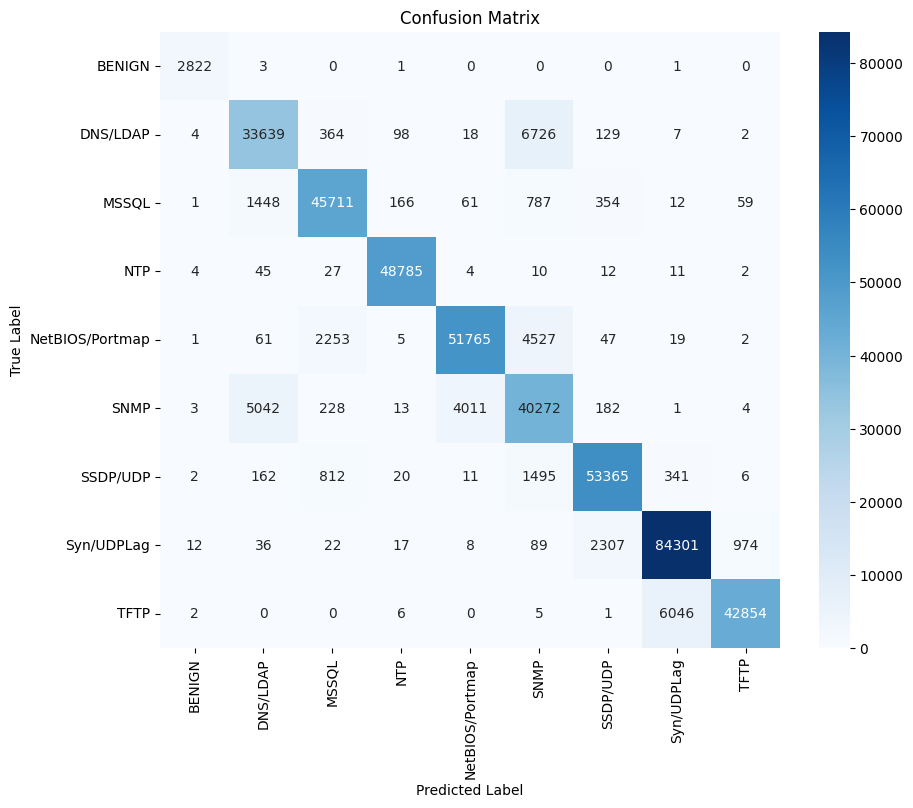

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_encoder.classes_), yticklabels=list(label_encoder.classes_))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

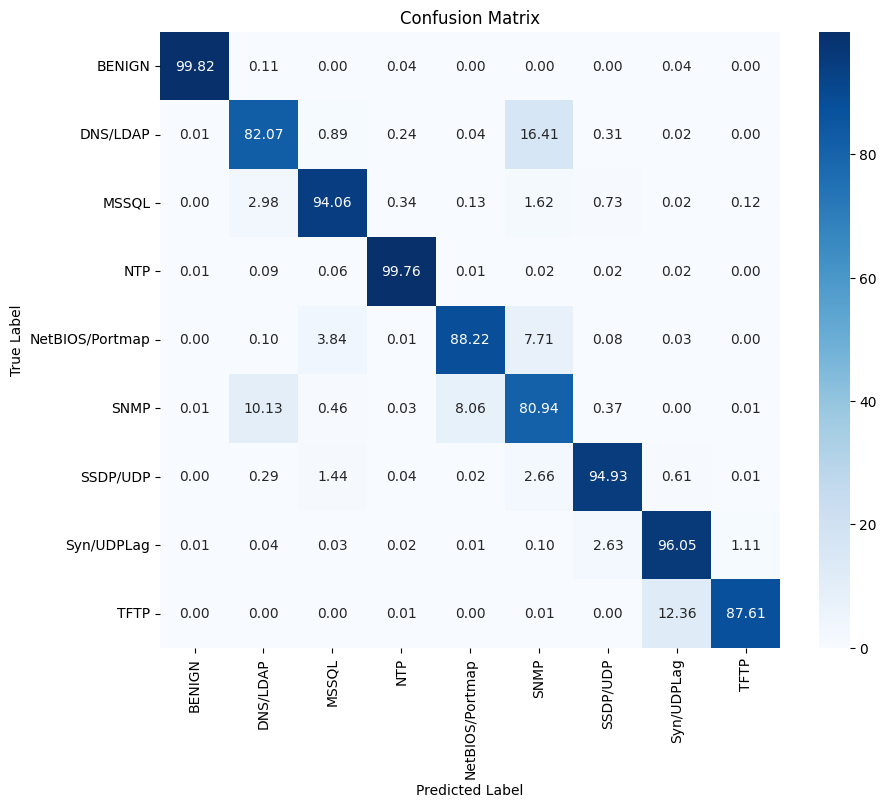

In [17]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=list(label_encoder.classes_), yticklabels=list(label_encoder.classes_))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()